# 🏠 Real Estate Investment Success Model

This project analyzes real estate data to identify whether a property is a viable investment.  
It includes a scoring algorithm, price-per-square-foot logic, and a regression model to predict home prices.
If the CSV file is not already in the files, then simply upload it to use the code.

## 📊 Features Used:
- Bedrooms
- Bathrooms
- House Size (sqft)
- Acre Lot Size

## ✅ Output:
- Investment Viability (True/False)
- Predicted Home Price
- Price per Sqft

## 📈 Visualizations:
- Heatmap of Feature Correlations
- Linear Regression: Actual vs Predicted Price


Simply run the code and the code will read a csv file with house statistics from Puerto Rico. The code will then output a table showing the statistics of the house and state whether or not the home is a viable investement.

In [ ]:
import pandas as pd

# Load the file after upload
df = pd.read_csv('/content/realtor-data.zip.csv')

# Show first rows
df.head()

df.columns

# Drop rows with missing values in key columns
df_clean = df[['price', 'house_size', 'bed', 'bath']].dropna()

# Convert columns to numeric
df_clean['price'] = pd.to_numeric(df_clean['price'], errors='coerce')
df_clean['house_size'] = pd.to_numeric(df_clean['house_size'], errors='coerce')

# Remove rows with 0 or null house size
df_clean = df_clean[df_clean['house_size'] > 0]

# Calculate price per square foot
df_clean['price_per_sqft'] = df_clean['price'] / df_clean['house_size']

# Add additional numeric conversions
df_clean['bed'] = pd.to_numeric(df_clean['bed'], errors='coerce')
df_clean['bath'] = pd.to_numeric(df_clean['bath'], errors='coerce')
df_clean['acre_lot'] = pd.to_numeric(df['acre_lot'], errors='coerce')  # from original df

# Fill missing acre_lot with 0 (assuming 0 lot if missing)
df_clean['acre_lot'] = df_clean['acre_lot'].fillna(0)

# Calculate investment "score" from multiple factors
df_clean['score'] = (
    (df_clean['bed'] >= 3).astype(int) +                                # 1 point if 3+ beds
    (df_clean['bath'] >= 2).astype(int) +                               # 1 point if 2+ baths
    (df_clean['acre_lot'] > 0.2).astype(int) +                          # 1 point for big lot
    (df_clean['price_per_sqft'] < df_clean['price_per_sqft'].mean()).astype(int)  # 1 point if cheaper than average
)

# New decision rule: 3+ points = viable investment
df_clean['viable_investment'] = df_clean['score'] >= 3

# View new results
df_clean[['price', 'bed', 'bath', 'acre_lot', 'price_per_sqft', 'score', 'viable_investment']].head(10)


,price,bed,bath,acre_lot,price_per_sqft,score,viable_investment
0,105000.0,3.0,2.0,0.12,114.130435,3,True
1,80000.0,4.0,2.0,0.08,52.390308,3,True
2,67000.0,2.0,1.0,0.15,89.572193,1,False
3,145000.0,4.0,2.0,0.10,80.555556,3,True
5,179000.0,4.0,3.0,0.46,71.031746,4,True
6,50000.0,3.0,1.0,0.20,24.509804,2,False
7,71600.0,3.0,2.0,0.08,68.190476,3,True
8,100000.0,2.0,1.0,0.09,91.575092,1,False
9,300000.0,5.0,3.0,7.46,55.524708,4,True
10,89000.0,3.0,2.0,13.39,80.470163,4,True


Code creates a linear regression model showing what the predicted price of home is based on its features vs its actual price.

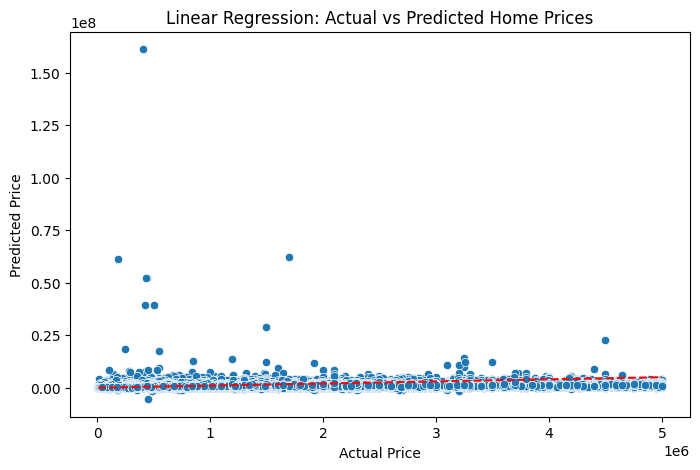

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Select features and target
features = df_clean[['bed', 'bath', 'house_size']]
target = df_clean['price']



# Fit linear regression
model = LinearRegression()
model.fit(features, target)

# Predict prices
df_clean['predicted_price'] = model.predict(features)

df_clean = df_clean[
    (df_clean['price'] > 10000) &
    (df_clean['price'] < 5e6) &  # remove outliers over $5M
    (df_clean['house_size'] > 100) &
    (df_clean['house_size'] < 10000)
]
# Plot actual vs predicted
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_clean['price'], y=df_clean['predicted_price'])
plt.plot([df_clean['price'].min(), df_clean['price'].max()],
         [df_clean['price'].min(), df_clean['price'].max()],
         color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Linear Regression: Actual vs Predicted Home Prices')
plt.show()



Creates a heat map to find correlation relationships between different aspects of a home.

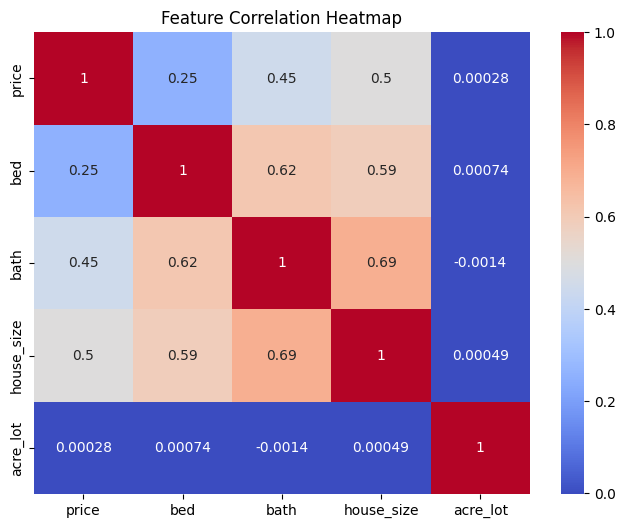

In [ ]:
plt.figure(figsize=(8, 6))
# Create a heatmap to visualize correlation between selected numeric features
# - df_clean[...] selects only the columns we want to analyze
# - .corr() computes the correlation matrix
# - annot=True displays the correlation values on the heatmap
# - cmap='coolwarm' uses a blue-to-red color gradient (blue = negative, red = positive correlation)
sns.heatmap(df_clean[['price', 'bed', 'bath', 'house_size', 'acre_lot']].corr(),
            annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()